In [22]:
import os
import gc

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path='/content/drive/My Drive/Colab Notebooks/crime_prediction'

#cwd = os.getcwd() #use __file__ if running a .py script.
file_path = os.path.join(path,'data','CrimesAll.csv')

In [9]:
file = pd.read_csv(file_path,sep=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
file.shape

(7153060, 22)

In [11]:
file=file.dropna(axis='index') #re-use file var to save memory

In [12]:
file.shape

(6472804, 22)

In [13]:
file.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
63299,11665567,JC234307,04/10/2019 04:37:00 PM,102XX S VERNON AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,511,5.0,9.0,49.0,17,1181051.0,1837225.0,2019,04/17/2020 03:50:24 PM,41.708589,-87.612583,"(41.708589, -87.612583094)"
63383,11667963,JC235212,04/12/2019 04:08:00 PM,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,1731,17.0,30.0,16.0,02,1147835.0,1921408.0,2019,10/02/2019 04:13:24 PM,41.940298,-87.732066,"(41.940297617, -87.732066473)"
63384,11667968,JC237058,04/19/2019 01:57:00 PM,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1532,15.0,28.0,25.0,17,1141669.0,1901165.0,2019,03/18/2020 03:52:17 PM,41.884865,-87.755230,"(41.884865037, -87.755230327)"
63460,11668309,JC238187,04/25/2019 05:20:00 PM,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,513,5.0,9.0,49.0,08B,1180832.0,1833222.0,2019,06/30/2019 03:56:27 PM,41.697609,-87.613508,"(41.697609261, -87.613507612)"
63864,11692179,JC261724,05/13/2019 05:26:00 PM,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,2222,22.0,21.0,73.0,08A,1169908.0,1844927.0,2019,06/30/2019 03:56:27 PM,41.729973,-87.653167,"(41.729973132, -87.653166753)"


In [14]:
file=file.drop(['ID','Case Number','Block','IUCR',\
          'Beat','District','Ward','Community Area',\
           'FBI Code','X Coordinate','Y Coordinate',\
           'Year','Updated On','Location']
          ,axis=1)

In [15]:
file.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
63299,04/10/2019 04:37:00 PM,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,41.708589,-87.612583
63383,04/12/2019 04:08:00 PM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,41.940298,-87.732066
63384,04/19/2019 01:57:00 PM,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,41.884865,-87.755230
63460,04/25/2019 05:20:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.697609,-87.613508
63864,05/13/2019 05:26:00 PM,ASSAULT,SIMPLE,STREET,False,False,41.729973,-87.653167


In [16]:
location={'Latitude': file.loc[:,'Latitude'],
         'Longitude': file.loc[:,'Longitude']}

In [17]:
location=pd.DataFrame(location)

In [18]:
location

,Latitude,Longitude
63299,41.708589,-87.612583
63383,41.940298,-87.732066
63384,41.884865,-87.755230
63460,41.697609,-87.613508
63864,41.729973,-87.653167
...,...,...
7153052,41.959944,-87.767226
7153053,41.917879,-87.742535
7153055,41.862830,-87.717040
7153056,41.864278,-87.659660


In [56]:
#Fit the data.
kmeans = KMeans(n_clusters=8)
kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
#Learn the labels.
labels = kmeans.predict(location)
centroids = kmeans.cluster_centers_

In [58]:
colmap={1:'r',2:'g',3:'b',4:'c',5:'m',6:'y',7:'k',\
        8:'r',9:'g',10:'b',\
        11:'c',12:'m',13:'y',\
        14:'r',15:'g',16:'b',\
        17:'c',18:'m',19:'y',\
        20:'k'\
        }

(-88.0, -87.4)

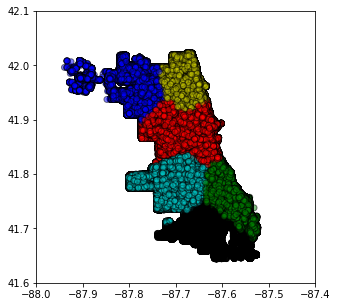

In [62]:
fig = plt.figure(figsize=(5, 5))
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(location['Longitude'], location['Latitude'], color=colors, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.ylim(41.6, 42.1)
plt.xlim(-88, -87.4)
#plt.show()

In [68]:
primary_type=file.groupby(['Primary Type'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [67]:
df = pd.DataFrame({'Type' : ['Pokemon', 'Pokemon', 'Bird', 'Pokemon', 'Bird', 'Pokemon', 'Pokemon', 'Bird'],'Name' : ['Jerry', 'Jerry', 'Flappy Bird', 'Mudkip','Pigeon', 'Mudkip', 'Jerry', 'Pigeon']})  
f = df.groupby(['Type','Name'])['Type'].agg({'Frequency':'count'})
f.sort_values('Frequency',ascending=False, inplace=True)

d = {k:list(f.ix[k].index) for k in f.index.levels[0]}
print(d)
# {'Bird': ['Pigeon', 'Flappy Bird'], 'Pokemon': ['Jerry', 'Mudkip']}

{<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fbf41887eb8>}

In [70]:
d = {k:list(primary_type[k]) for k in primary_type.index.levels[0]}
print(d)

AttributeError: ignored

In [71]:
d= {primary_type type for type in primary_type}

SyntaxError: ignored

In [73]:
print(primary_type)

In [75]:
crime={
    'Date': file.loc[:,'Date'],
    'Type': file.loc[:,'Primary Type'],
    'Latitude': file.loc[:,'Latitude'],
    'Longitude': file.loc[:,'Longitude']}

In [83]:
crime=pd.DataFrame(crime)

In [78]:
crime

,date,type,Latitude,Longitude
63299,04/10/2019 04:37:00 PM,SEX OFFENSE,41.708589,-87.612583
63383,04/12/2019 04:08:00 PM,OFFENSE INVOLVING CHILDREN,41.940298,-87.732066
63384,04/19/2019 01:57:00 PM,OFFENSE INVOLVING CHILDREN,41.884865,-87.755230
63460,04/25/2019 05:20:00 PM,BATTERY,41.697609,-87.613508
63864,05/13/2019 05:26:00 PM,ASSAULT,41.729973,-87.653167
...,...,...,...,...
7153052,03/18/2015 05:08:00 PM,ASSAULT,41.959944,-87.767226
7153053,05/26/2019 12:10:00 AM,BATTERY,41.917879,-87.742535
7153055,05/26/2019 05:13:00 PM,OTHER OFFENSE,41.862830,-87.717040
7153056,05/26/2019 06:48:00 AM,HOMICIDE,41.864278,-87.659660


In [80]:
primary_type=crime.groupby(['type'])

In [81]:
primary_type